In [1]:
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

print(tf.__version__)

2023-04-27 18:41:48.982429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [3]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# normalize divide values by 255

x_train, x_test = x_train / 255.0, x_test / 255.0

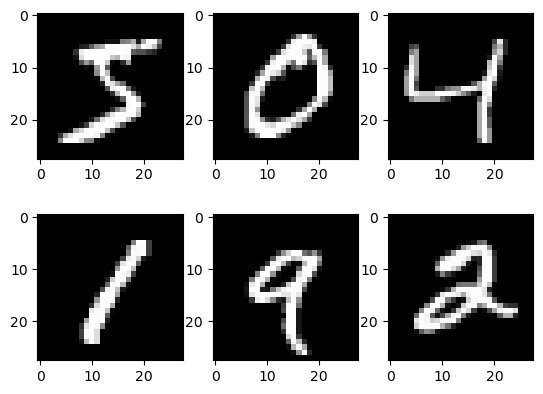

In [5]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
plt.show()


In [16]:
# model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

In [17]:
# Loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

In [18]:
# model compile
model.compile(loss=loss, optimizer=optim, metrics = metrics, shuffle = True, verbose = 2)

In [24]:
#trainingn

batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, shuffle = True, verbose = 2)

Epoch 1/5
938/938 - 1s - loss: 0.0172 - accuracy: 0.9953 - 947ms/epoch - 1ms/step
Epoch 2/5
938/938 - 1s - loss: 0.0148 - accuracy: 0.9957 - 977ms/epoch - 1ms/step
Epoch 3/5
938/938 - 1s - loss: 0.0115 - accuracy: 0.9971 - 931ms/epoch - 993us/step
Epoch 4/5
938/938 - 1s - loss: 0.0105 - accuracy: 0.9973 - 988ms/epoch - 1ms/step
Epoch 5/5
938/938 - 1s - loss: 0.0084 - accuracy: 0.9979 - 942ms/epoch - 1ms/step


In [25]:
# evaluate
model.evaluate(x_test, y_test, batch_size = batch_size)

157/157 [==============================] - 0s 868us/step - loss: 0.0778 - accuracy: 0.9787


[0.07776934653520584, 0.9786999821662903]

In [26]:
# predictions
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

In [29]:
predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.0175943e-09 8.6367207e-12 6.0202112e-08 2.7191224e-06 4.7597195e-15
 1.2801662e-09 1.3111647e-16 9.9999660e-01 3.7904616e-07 1.1099378e-07], shape=(10,), dtype=float32)
7


In [31]:
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.0175943e-09 8.6367207e-12 6.0202112e-08 2.7191224e-06 4.7597195e-15
 1.2801662e-09 1.3111647e-16 9.9999660e-01 3.7904616e-07 1.1099378e-07], shape=(10,), dtype=float32)
7


In [32]:
predictions = model.predict(x_test, batch_size = batch_size)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

157/157 [==============================] - 0s 814us/step
tf.Tensor(
[2.01759431e-09 8.63675364e-12 6.02019981e-08 2.71911995e-06
 4.75971954e-15 1.28016620e-09 1.31115975e-16 9.99996603e-01
 3.79046497e-07 1.10993994e-07], shape=(10,), dtype=float32)
7


In [35]:
pred05s = predictions[0:6]
print(pred05s.shape)
label05s = np.argmax(pred05s, axis = 1)
print(label05s)

(6, 10)
[7 2 1 0 4 1]


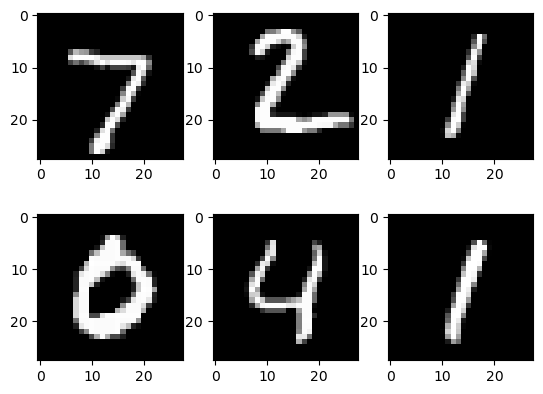

In [34]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[i], cmap = 'gray')
plt.show()